# Anuran Families Recognition

## Importing the libraries

In [83]:
import pathlib
import numpy as np
import pandas as pd
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

DATA_DIR = pathlib.Path('./data/')


## Importing the dataset

In [84]:
data = pd.read_csv(DATA_DIR / 'Frogs_MFCCs.csv')
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [85]:
targets = data['Family']
data.drop(['Family', 'Genus', 'Species'], axis=1, inplace=True)

In [86]:
data.shape

(7195, 23)

## Preprocessing the dataset

In [87]:
scalar = StandardScaler()
data_scaled = scalar.fit_transform(data)

## Splitting the dataset into the Training set and Test set

In [88]:
train_data, test_data, train_targets, test_targets = train_test_split(
    data_scaled, targets, test_size=0.3, random_state=42)


In [89]:
train_data.shape, test_data.shape

((5036, 23), (2159, 23))

## Training the linear SVM model on the training set

In [90]:
linear_SVM = LinearSVC(C=1.0, random_state=42, max_iter=10000)
linear_SVM.fit(train_data, train_targets)

LinearSVC(max_iter=10000, random_state=42)

### Evaluating the model on the training set

In [91]:
linear_SVM.score(train_data, train_targets)

0.9698173153296267

### Evaluating the model on the test set

In [92]:
linear_SVM.score(test_data, test_targets)

0.9573876794812413

### Confusion Matrix of the test set

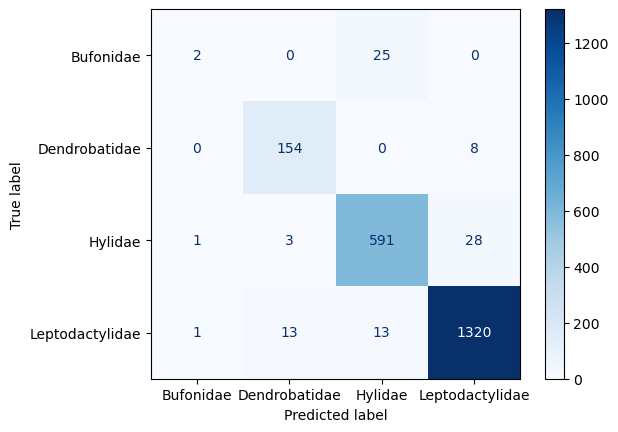

In [93]:
cm = confusion_matrix(test_targets, linear_SVM.predict(test_data))
cm_plot = ConfusionMatrixDisplay(
    cm, display_labels=linear_SVM.classes_)
cm_plot.plot(cmap='Blues')
plt.show()


## Training the SVM model with linear kernel

Training accuracy:  0.982525814138205
test accuracy:  0.9722093561834182
Support Vectors: 
 [[ 0.14657792  0.21643204  0.10529614 ... -0.50082258 -0.70683514
   2.10239731]
 [ 0.14657792  0.22595216  0.01316335 ... -0.39699398 -0.73673807
   2.10239731]
 [ 0.14657792  0.26379668  0.11333943 ... -0.43799286 -0.67328498
   2.10239731]
 ...
 [ 0.14657792 -1.74411121 -0.8860118  ... -0.67446255 -2.27347893
   1.64831559]
 [ 0.14657792 -0.4180986  -0.85524297 ... -0.28033091 -0.60724797
  -1.8329776 ]
 [ 0.14657792  0.91784714 -0.8157383  ... -1.03108478 -0.55995769
  -1.45457616]]
Support Vectors Shape:  (361, 23)
Number of Support Vectors:  361


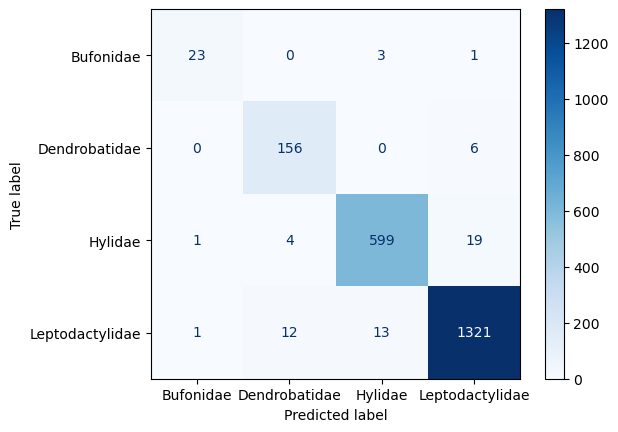

In [94]:
linear_kernel_SVM = SVC(kernel='linear', C=1.0, random_state=42)
linear_kernel_SVM.fit(train_data, train_targets)

print('Training accuracy: ',linear_kernel_SVM.score(train_data, train_targets))
print('test accuracy: ',linear_kernel_SVM.score(test_data, test_targets))
print('Support Vectors: \n', linear_kernel_SVM.support_vectors_)
print('Support Vectors Shape: ', linear_kernel_SVM.support_vectors_.shape)


number_of_support_vectors = linear_kernel_SVM.support_vectors_.shape[0]
print('Number of Support Vectors: ', number_of_support_vectors)

cm = confusion_matrix(test_targets, linear_kernel_SVM.predict(test_data))
cm_plot = ConfusionMatrixDisplay(
    cm, display_labels=linear_kernel_SVM.classes_)
cm_plot.plot(cmap='Blues')
plt.show()


## Training the polynomial kernel SVM model on the training set

In [95]:
poly_SVM = SVC(kernel="poly", degree=3, C=1, random_state=42)
poly_SVM.fit(train_data, train_targets)

SVC(C=1, kernel='poly', random_state=42)

In [96]:
poly_SVM.score(train_data, train_targets)

0.9962271644162033

In [97]:
poly_SVM.score(test_data, test_targets)

0.9851783232978231

### Fine-tunning regularization parameter

In [98]:

train_data_splitted, val_data, train_targets_splitted, val_targets = \
    train_test_split(
        train_data, train_targets, test_size=0.2, random_state=42)

C_list = np.arange(0.1, 20, 0.1)
val_acc = []
train_acc = []
val_acc_bst = 0
best_C = 0

for c in C_list:
    poly_SVM = SVC(kernel="poly", degree=3, C=c, random_state=42)
    poly_SVM.fit(train_data_splitted, train_targets_splitted)
    train_acc.append(poly_SVM.score(
        train_data_splitted, train_targets_splitted))
    val_acc.append(poly_SVM.score(val_data, val_targets))

    if val_acc[-1] > val_acc_bst:
        val_acc_bst = val_acc[-1]
        best_C = c

print('Best C: ', best_C)
print('Best Validation Accuracy: ', val_acc_bst)


Best C:  1.2000000000000002
Best Validation Accuracy:  0.9880952380952381


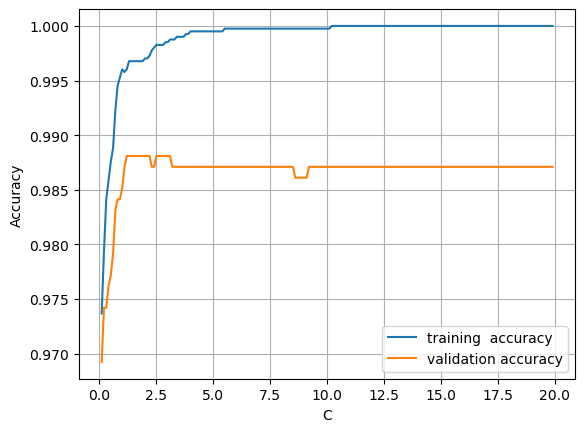

In [99]:
plt.figure()
plt.plot(C_list, train_acc, label='training  accuracy')
plt.plot(C_list, val_acc, label='validation accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [100]:
best_C

1.2000000000000002

### Training the model on the whole training set with the best regularization parameter

In [101]:
poly_SVM = SVC(kernel="poly", degree=3, C=best_C, random_state=42)
poly_SVM.fit(train_data, train_targets)

SVC(C=1.2000000000000002, kernel='poly', random_state=42)

### Evaluating the best model

Training accuracy:  0.9966243050039714
test accuracy:  0.9865678554886521
Support Vectors: 
 [[ 0.14657792  0.21643204  0.10529614 ... -0.50082258 -0.70683514
   2.10239731]
 [ 0.14657792  0.22260309 -0.00700371 ... -0.38060115 -0.66781723
   2.10239731]
 [ 0.14657792  0.26379668  0.11333943 ... -0.43799286 -0.67328498
   2.10239731]
 ...
 [ 0.14657792 -0.46403897 -0.85717565 ... -0.41272459  0.72954656
  -0.31937186]
 [ 0.14657792 -0.23515798  1.10277777 ...  0.3875004   0.28345022
  -0.47073244]
 [ 0.14657792 -0.02503486 -0.48962078 ...  0.09818071  0.8022124
  -0.39505215]]
Support Vectors Shape:  (617, 23)
Number of Support Vectors:  617


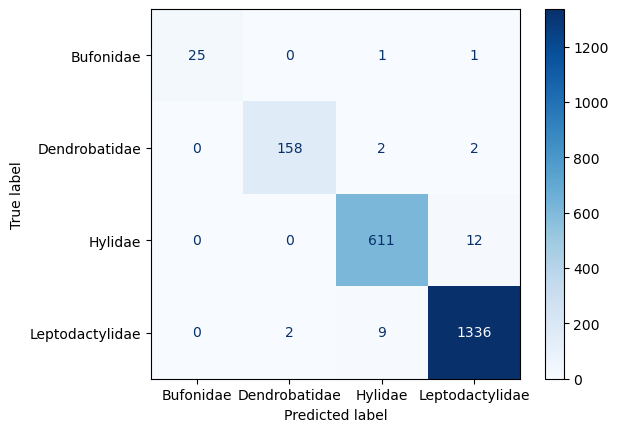

In [102]:
print('Training accuracy: ',poly_SVM.score(train_data, train_targets))
print('test accuracy: ',poly_SVM.score(test_data, test_targets))
print('Support Vectors: \n', poly_SVM.support_vectors_)
print('Support Vectors Shape: ', poly_SVM.support_vectors_.shape)

number_of_support_vectors = poly_SVM.support_vectors_.shape[0]
print('Number of Support Vectors: ', number_of_support_vectors)

cm = confusion_matrix(test_targets, poly_SVM.predict(test_data))
cm_plot = ConfusionMatrixDisplay(
    cm, display_labels=poly_SVM.classes_)
cm_plot.plot(cmap='Blues')
plt.show()

## Comparing RBF and Polynomial kernels

In [103]:
poly_SVM = SVC(kernel="poly", degree=3,random_state=42)
poly_SVM.fit(train_data_splitted, train_targets_splitted)

poly_SVM.score(val_data, val_targets)

0.9851190476190477

In [104]:
RBF_SVM = SVC(kernel="rbf", random_state=42)
RBF_SVM.fit(train_data_splitted, train_targets_splitted)

RBF_SVM.score(val_data, val_targets)

0.9880952380952381

The best kernel is RBF.

Training accuracy:  0.9984114376489277
test accuracy:  0.9939786938397406
Support Vectors: 
 [[ 0.14657792  0.21643204  0.10529614 ... -0.50082258 -0.70683514
   2.10239731]
 [ 0.14657792  0.22595216  0.01316335 ... -0.39699398 -0.73673807
   2.10239731]
 [ 0.14657792  0.26379668  0.11333943 ... -0.43799286 -0.67328498
   2.10239731]
 ...
 [ 0.14657792  0.91784714 -0.8157383  ... -1.03108478 -0.55995769
  -1.45457616]
 [-5.7851824   2.89115924  0.40749242 ...  0.74725736  0.99024059
  -0.47073244]
 [ 0.14657792  1.55796907 -0.32003586 ... -0.12253556 -0.78710378
  -1.60593674]]
Support Vectors Shape:  (534, 23)
Number of Support Vectors:  534


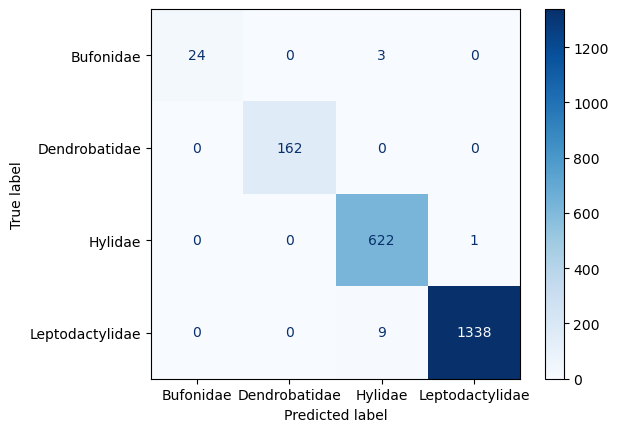

In [105]:
RBF_SVM = SVC(kernel="rbf", random_state=42)
RBF_SVM.fit(train_data, train_targets)

print('Training accuracy: ',RBF_SVM.score(train_data, train_targets))
print('test accuracy: ',RBF_SVM.score(test_data, test_targets))
print('Support Vectors: \n', RBF_SVM.support_vectors_)
print('Support Vectors Shape: ', RBF_SVM.support_vectors_.shape)

number_of_support_vectors = RBF_SVM.support_vectors_.shape[0]
print('Number of Support Vectors: ', number_of_support_vectors)

cm = confusion_matrix(test_targets, RBF_SVM.predict(test_data))
cm_plot = ConfusionMatrixDisplay(
    cm, display_labels=RBF_SVM.classes_)
cm_plot.plot(cmap='Blues')
plt.show()


## Fine-tunning regulularization parameter on RBF kernel SVM

Best C:  2.4000000000000004
Best Validation Accuracy:  0.9920634920634921


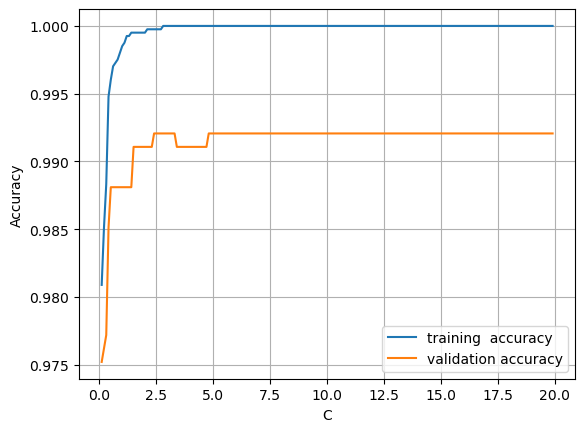

In [106]:
C_list = np.arange(0.1, 20, 0.1)
val_acc = []
train_acc = []
val_acc_bst = 0
best_C = 0

for c in C_list:
    RBF_SVM = SVC(kernel="rbf", C=c, random_state=42)
    RBF_SVM.fit(train_data_splitted, train_targets_splitted)
    train_acc.append(RBF_SVM.score(
        train_data_splitted, train_targets_splitted))
    val_acc.append(RBF_SVM.score(val_data, val_targets))

    if val_acc[-1] > val_acc_bst:
        val_acc_bst = val_acc[-1]
        best_C = c

print('Best C: ', best_C)
print('Best Validation Accuracy: ', val_acc_bst)

plt.figure()
plt.plot(C_list, train_acc, label='training  accuracy')
plt.plot(C_list, val_acc, label='validation accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


Training accuracy:  0.999801429706116
test accuracy:  0.9958314034275128
Support Vectors: 
 [[ 0.14657792  0.26379668  0.11333943 ... -0.43799286 -0.67328498
   2.10239731]
 [ 0.14657792  2.40150058  1.46296075 ...  1.34532079 -0.74758089
   2.10239731]
 [ 0.14657792 -0.06552403  0.07329306 ... -0.51772826 -0.9660733
   1.95103674]
 ...
 [ 0.14657792  0.91784714 -0.8157383  ... -1.03108478 -0.55995769
  -1.45457616]
 [-5.7851824   2.89115924  0.40749242 ...  0.74725736  0.99024059
  -0.47073244]
 [ 0.14657792  1.55796907 -0.32003586 ... -0.12253556 -0.78710378
  -1.60593674]]
Support Vectors Shape:  (477, 23)
Number of Support Vectors:  477


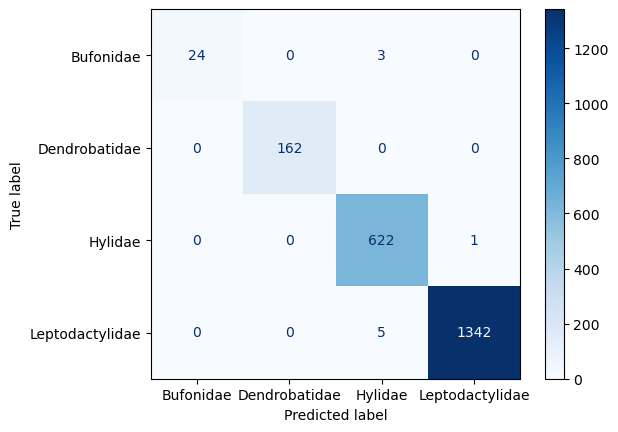

In [107]:
RBF_SVM = SVC(kernel="rbf", C=best_C, random_state=42)
RBF_SVM.fit(train_data, train_targets)

print('Training accuracy: ',RBF_SVM.score(train_data, train_targets))
print('test accuracy: ',RBF_SVM.score(test_data, test_targets))
print('Support Vectors: \n', RBF_SVM.support_vectors_)
print('Support Vectors Shape: ', RBF_SVM.support_vectors_.shape)

number_of_support_vectors = RBF_SVM.support_vectors_.shape[0]
print('Number of Support Vectors: ', number_of_support_vectors)

cm = confusion_matrix(test_targets, RBF_SVM.predict(test_data))
cm_plot = ConfusionMatrixDisplay(
    cm, display_labels=RBF_SVM.classes_)
cm_plot.plot(cmap='Blues')
plt.show()

## Fine-tunning C parameter on RBF kernel SVM using cross-validation

Best C:  0
Best Validation Accuracy:  0


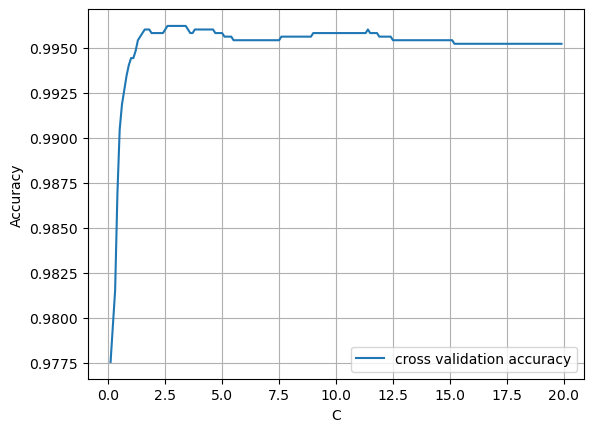

In [108]:
C_list = np.arange(0.1, 20, 0.1)
cross_val_scores = []
cross_val_bst = 0
best_C = 0

for c in C_list:
    RBF_SVM = SVC(kernel="rbf", C=c, random_state=42)

    cross_val_scores.append(cross_val_score(
        RBF_SVM, train_data, train_targets, cv=4).mean())

    if cross_val_scores[-1] > cross_val_bst:
        val_acc_bst = val_acc[-1]
        best_C = c

print('Best C: ', cross_val_bst)
print('Best Validation Accuracy: ', cross_val_bst)

plt.figure()
plt.plot(C_list, cross_val_scores, label='cross validation accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


Training accuracy:  1.0
test accuracy:  0.9962945808244558
Support Vectors: 
 [[ 0.14657792  2.40150058  1.46296075 ...  1.34532079 -0.74758089
   2.10239731]
 [ 0.14657792 -0.06552403  0.07329306 ... -0.51772826 -0.9660733
   1.95103674]
 [ 0.14657792  0.78134133  1.53722708 ...  1.52115989 -0.30268949
   2.10239731]
 ...
 [ 0.14657792  0.91784714 -0.8157383  ... -1.03108478 -0.55995769
  -1.45457616]
 [-5.7851824   2.89115924  0.40749242 ...  0.74725736  0.99024059
  -0.47073244]
 [ 0.14657792  1.55796907 -0.32003586 ... -0.12253556 -0.78710378
  -1.60593674]]
Support Vectors Shape:  (433, 23)
Number of Support Vectors:  433


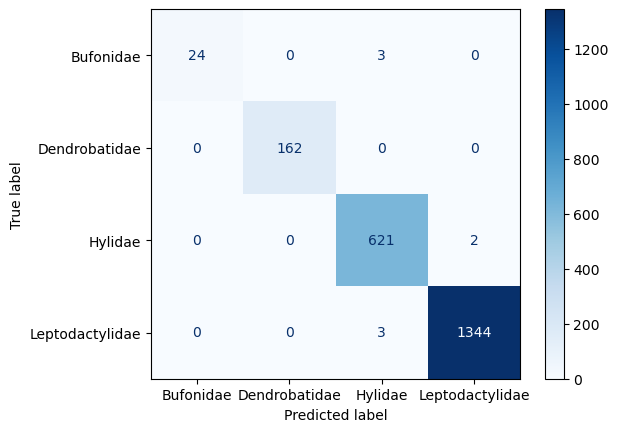

In [109]:
RBF_SVM = SVC(kernel="rbf", C=best_C, random_state=42)
RBF_SVM.fit(train_data, train_targets)

print('Training accuracy: ',RBF_SVM.score(train_data, train_targets))
print('test accuracy: ',RBF_SVM.score(test_data, test_targets))
print('Support Vectors: \n', RBF_SVM.support_vectors_)
print('Support Vectors Shape: ', RBF_SVM.support_vectors_.shape)

number_of_support_vectors = RBF_SVM.support_vectors_.shape[0]
print('Number of Support Vectors: ', number_of_support_vectors)

cm = confusion_matrix(test_targets, RBF_SVM.predict(test_data))
cm_plot = ConfusionMatrixDisplay(
    cm, display_labels=RBF_SVM.classes_)
cm_plot.plot(cmap='Blues')
plt.show()